In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV              


In [7]:
df = pd.read_csv('../datos/datos_sueño.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Traduccion de las filas y las columnas

In [8]:
columnas_traducidas = {
    'Person ID': 'id',
    'Gender': 'genero',
    'Age': 'edad',
    'Occupation': 'ocupacion',
    'Sleep Duration': 'duracion_sueño',
    'Quality of Sleep': 'calidad_sueño',
    'Physical Activity Level': 'nivel_actividad_fisica',
    'Stress Level': 'nivel_estres',
    'BMI Category':  'categoria_peso',
    'Blood Pressure': 'presion_alterial',
    'Heart Rate': 'ritmo_cardiaco',
    'Daily Steps': 'pasos_diarios',
    'Sleep Disorder': 'trastorno_sueño'
    }

df.rename(columns=columnas_traducidas, inplace = True)

filas_traducidas = {
    'genero': {'Male': 'Masculino', 'Female': 'Femenino'},
    'ocupacion': {
        'Software Engineer': 'Ingeniero de Software',
        'Doctor': 'Médico',
        'Sales Representative': 'Representante de Ventas',
        'Teacher': 'Profesor',
        'Nurse': 'Enfermero/a',
        'Engineer': 'Ingeniero/a',
        'Accountant': 'Contador/a',
        'Lawyer': 'Abogado/a',
        'Scientist': 'Científico/a',
        'Salesperson': 'Vendedor/a',
        'Manager': 'Gerente'
    },
    'trastorno_del_sueño': {
        'Sleep Apnea': 'Apnea del Sueño',
        'Insomnia': 'Insomnio'
    },
    'categoria_peso': {
        'Normal': 'Normal',
        'Overweight': 'Sobrepeso',
        'Obese': 'Obesidad',
        'Normal Weight': 'Peso Normal'
    }
}

df.replace(filas_traducidas, inplace = True)    

## Inspeccion del DataFrame

In [9]:
print(f'Descripcion del DataFrame: \nColumnas: {df.shape[1]}\nFilas: {df.shape[0]}\n')
print(f'\nInformacion general del Dataframe: {df.info()}\n')

Descripcion del DataFrame: 
Columnas: 13
Filas: 374

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      374 non-null    int64  
 1   genero                  374 non-null    object 
 2   edad                    374 non-null    int64  
 3   ocupacion               374 non-null    object 
 4   duracion_sueño          374 non-null    float64
 5   calidad_sueño           374 non-null    int64  
 6   nivel_actividad_fisica  374 non-null    int64  
 7   nivel_estres            374 non-null    int64  
 8   categoria_peso          374 non-null    object 
 9   presion_alterial        374 non-null    object 
 10  ritmo_cardiaco          374 non-null    int64  
 11  pasos_diarios           374 non-null    int64  
 12  trastorno_sueño         155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory 

In [10]:
round(df.describe(),2)

,id,edad,duracion_sueño,calidad_sueño,nivel_actividad_fisica,nivel_estres,ritmo_cardiaco,pasos_diarios
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00


## Exploracion de los datos nulos

In [11]:
print(df.isnull().sum())


id                          0
genero                      0
edad                        0
ocupacion                   0
duracion_sueño              0
calidad_sueño               0
nivel_actividad_fisica      0
nivel_estres                0
categoria_peso              0
presion_alterial            0
ritmo_cardiaco              0
pasos_diarios               0
trastorno_sueño           219
dtype: int64


La columna de "trastorno de sueño" tiene 219 nulos. Esa columna no es tan interesante a analizar asique voy a eliminarla para no tener dificultades mas adelante
Tambien voy a eliminar la columna de id, ya que no muestra nombres, para evitar errores mas adelante

In [12]:
df.drop(columns=['trastorno_sueño', 'id'], inplace=True)        # Eliminacion de la columna trastorno del sueño y la columna id
df.head()

,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad_fisica,nivel_estres,categoria_peso,presion_alterial,ritmo_cardiaco,pasos_diarios
0,Masculino,27,Ingeniero de Software,6.1,6,42,6,Sobrepeso,126/83,77,4200
1,Masculino,28,Médico,6.2,6,60,8,Normal,125/80,75,10000
2,Masculino,28,Médico,6.2,6,60,8,Normal,125/80,75,10000
3,Masculino,28,Representante de Ventas,5.9,4,30,8,Obesidad,140/90,85,3000
4,Masculino,28,Representante de Ventas,5.9,4,30,8,Obesidad,140/90,85,3000


# Investigacion

## 1. ¿Cómo afecta el nivel de estres a la duracion del sueño ?

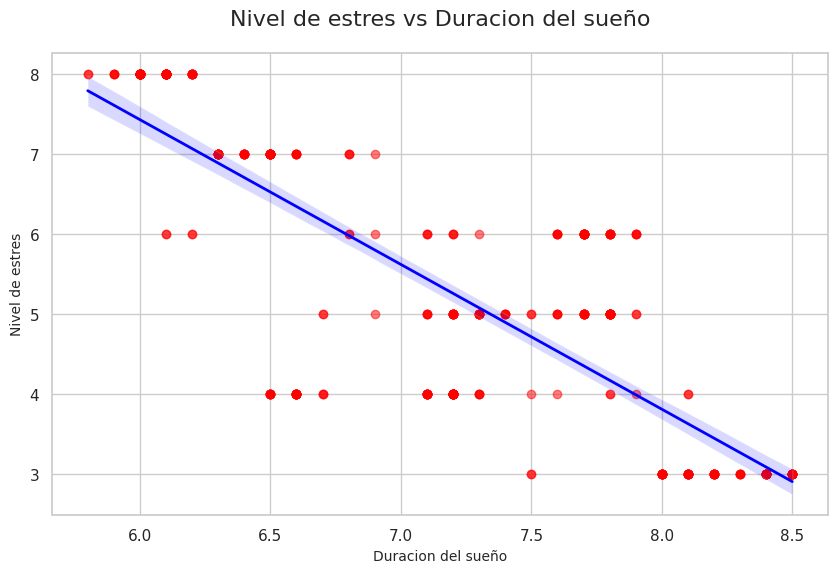

In [13]:
# Configuracion de los graficos
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

dispersion_sueño_estres = sns.regplot(
    data = df,
    x = 'duracion_sueño',
    y = 'nivel_estres',
    scatter_kws= {'alpha': 0.5, 'color': 'red'},        # caracteristicas de los puntos: transparencia = 0,5, color : rojo
    line_kws= {'color': 'blue', 'lw' : 2}               # caracteristicas de la linea: color = azul; ancho de la desviacion2
)

plt.title('Nivel de estres vs Duracion del sueño', fontsize= 16, pad = 20)
plt.xlabel('Duracion del sueño', fontsize = 10)
plt.ylabel('Nivel de estres', fontsize = 10)

plt.show()

In [14]:
correlacion_estres_sueño = df[['nivel_estres', 'duracion_sueño']].corr(method='pearson')
correlacion_estres_sueño

,nivel_estres,duracion_sueño
nivel_estres,1.000000,-0.811023
duracion_sueño,-0.811023,1.000000


Coeficiente de pearson (-1, 1)

    + -1: Correlacion negativa perfecta
    + 0: No tiene ningun tipo de correlacion
    + 1: Correlacion positiva perfecta.

Como el signo es negativo, a medida que aumenta el estres, disminuye la duracion del sueño

El coeficiente es 81,1% de la variabilidad del sueño esta relacionada con el estres. En terminos simples: "El estres es una gran parte del porque las personas duermen menos" a mas estres menos duracion del sueño

In [15]:
corr, p_valor =pearsonr(df['nivel_estres'], df['duracion_sueño'])
print(f'La correlacion es: {corr:.3f}\n')
print(f'P-valor {p_valor:.4f}')

# Interpretacion del P-valor
valor = 0.5

if p_valor < valor:
    print('Conclusion: La correlacion es estadisticamente significativa')
else:
    print('Conclusion: No hay evidencia suficiente para afirmar la correlacion')

La correlacion es: -0.811

P-valor 0.0000
Conclusion: La correlacion es estadisticamente significativa


Por lo que se ve en la correlacion del estres y el sueño: 

    - El 81,1% de va variabilidad del sueño esta asociado al nivel de estres de la persona. En otras palabras: "el nivel de estres explica una gran parte de la duracion del sueño de las personas"
    - La correlacion se presenta con signo negativo, por ende, por cada unidad que aumenta el estres, disminuye la cantidad del sueño

## Realizando la regresion lineal del estres con la duracion del sueño

In [16]:
X = df[['nivel_estres']]            # Variable independiente (los doble corchete es para tranformarlo en un array 2D)
y = df['duracion_sueño']            # Variable dependiente (duracion del sueño)


X_entrenamiento, X_testeo, y_entrenamiento, y_testeo = train_test_split(
    X,
    y,
    test_size= 0.2,             # Toma el 20% de los datos para las pruebas y el 80% restantes para el entrenamiento del modelo
    random_state= 42            # Asegurar que siempre sea igual
)

print(f'Tamaño del conjunto de entrenamiento {X_entrenamiento.shape[0]} muestras')
print(f'Tamaño del conjunto de prueba {X_testeo.shape[0]} muestras')

Tamaño del conjunto de entrenamiento 299 muestras
Tamaño del conjunto de prueba 75 muestras


## Entrenamiento del modelo

In [ ]:
modelo = LinearRegression()         # Instanciando el modelo
modelo.fit(X_entrenamiento, y_entrenamiento)                    # Entrenamiento del modelo

# Realizar predicciones del conjunto de prueba
y_pred = modelo.predict(X_testeo)

# Calcular metricas de evolucion 
mse = mean_squared_error(y_testeo, y_pred)          # Calcula el promedio de los errores
rmse = np.sqrt(mse)                                 # Para volver a las unidades originales, en este caso horas

r2 = r2_score(y_testeo, y_pred)                     # La proporcion de la variabilidad en la variable dependiente que es explicada por el modelo


print("\nMétricas de evaluación del modelo:")
print(f"RMSE: {rmse:.2f} horas")
print(f"R²: {r2:.2f}")

# Interpretación de las métricas
print("\nInterpretación:")
print(f"- El modelo explica el {r2:.1%} de la variabilidad en la duración del sueño")
print(f"- El error promedio de predicción es de ±{rmse:.2f} horas")

# Mostrar coeficientes del modelo
print("\nCoeficientes del modelo:")
print(f"- Intercepto: {modelo.intercept_:.2f}")
print(f"- Pendiente (nivel_estres): {modelo.coef_[0]:.2f}")
print(f"Ecuación: duración_sueño = {modelo.intercept_:.2f} + ({modelo.coef_[0]:.2f} × nivel_estres)")

# Evaluación de la calidad del modelo
if r2 > 0.6 and rmse < 1.0:
    print("\n✅ Modelo con buen rendimiento predictivo")
elif r2 > 0.4:
    print("\n⚠️ Modelo con rendimiento moderado")
else:
    print("\n❌ Modelo con bajo rendimiento predictivo")


Métricas de evaluación del modelo:
RMSE: 0.44 horas
R²: 0.71

Interpretación:
- El modelo explica el 71.3% de la variabilidad en la duración del sueño
- El error promedio de predicción es de ±0.44 horas

Coeficientes del modelo:
- Intercepto: 9.09
- Pendiente (nivel_estres): -0.36
Ecuación: duración_sueño = 9.09 + (-0.36 × nivel_estres)

✅ Modelo con buen rendimiento predictivo


+ rmse(error cuadratico medio):
    ¿Que mide?: El error promedio de las predicciones, en las mismas unidades que Y (horas)
    Resultado +- 45 hs. El modelo se equivoca en promedio por 27 minutos en sus predicciones. Para predicciones de sueño, un error < 1 hs es aceptable

+ r2 (coeficiente de determinacion):
    ¿Que mide?: Proporcion de la variabilidad en Y que es explicada por el modelo. (0.66 = 66%)
    El modelo explica el 66% de por que las personas duermen mas o menos.
    En ciencias sociales/medicina, r^2 > 0.6 es generalmente aceptable.

+ Intercepto(8.52): Cuando el estres es 0, la duracion del sueño seria 8.52 hs (Es el "nivel base" de sueño sin estres)

+ Pendiente (-0,31): Por cada punto que aumenta el estres, el sueño disminuye 0.31 horas.

## Grafica del modelo

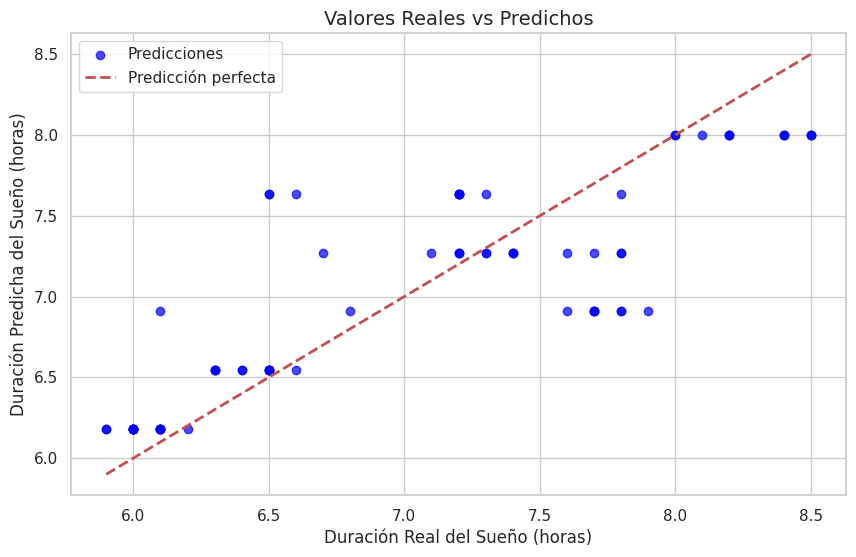

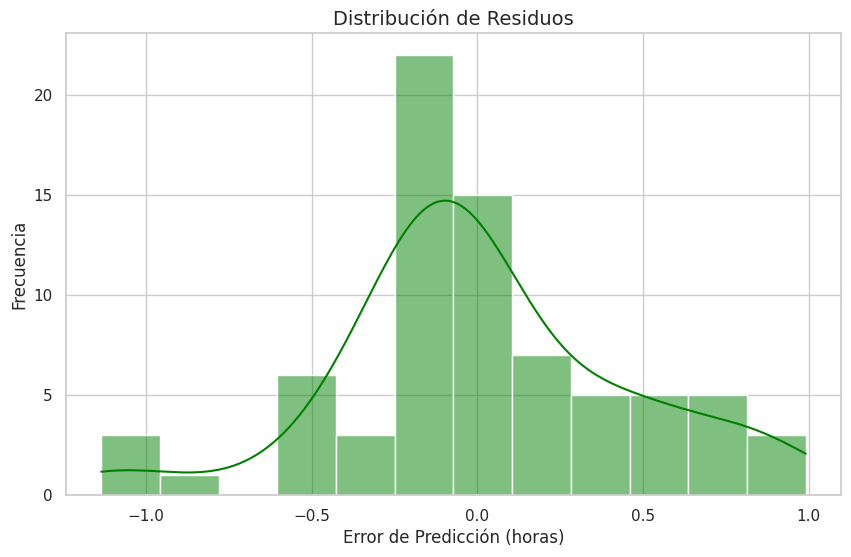

In [27]:
plt.figure(figsize=(10, 6))
    
# Graficar valores reales vs predichos
plt.scatter(y_testeo, y_pred, alpha=0.7, color='blue', label='Predicciones')

# Línea de referencia (predicción perfecta)
plt.plot([y_testeo.min(), y_testeo.max()], 
         [y_testeo.min(), y_testeo.max()], 
         'r--', lw=2, label='Predicción perfecta')

plt.title('Valores Reales vs Predichos', fontsize=14)
plt.xlabel('Duración Real del Sueño (horas)', fontsize=12)
plt.ylabel('Duración Predicha del Sueño (horas)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de residuos
residuos = y_testeo - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='green')
plt.title('Distribución de Residuos', fontsize=14)
plt.xlabel('Error de Predicción (horas)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

### Prediccion

In [28]:
# Suponiendo que ya ejecutaste todo tu código anterior y el modelo 'modelo' está entrenado

# 1. Crea un nuevo dato con el nivel de estrés que quieres probar
nuevo_nivel_estres = [[8]]  # ¡Importante los dobles corchetes!

# 2. Usa el modelo para predecir
prediccion_horas_sueño = modelo.predict(nuevo_nivel_estres)

# 3. Muestra el resultado de forma clara
print(f"\n--- Prueba de Predicción Individual ---")
print(f"Para un nivel de estrés de {nuevo_nivel_estres[0][0]}, el modelo predice una duración de sueño de {prediccion_horas_sueño[0]:.2f} horas.")

# --- Prueba con otro valor ---
nuevo_nivel_estres_2 = [[3]]
prediccion_horas_sueño_2 = modelo.predict(nuevo_nivel_estres_2)
print(f"Para un nivel de estrés de {nuevo_nivel_estres_2[0][0]}, el modelo predice una duración de sueño de {prediccion_horas_sueño_2[0]:.2f} horas.")


--- Prueba de Predicción Individual ---
Para un nivel de estrés de 8, el modelo predice una duración de sueño de 6.18 horas.
Para un nivel de estrés de 3, el modelo predice una duración de sueño de 8.00 horas.


/home/ignacio/Documentos/regresion_lineal/sueño_estres_lineal./.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ignacio/Documentos/regresion_lineal/sueño_estres_lineal./.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/home/ignacio/Documentos/regresion_lineal/sueño_estres_lineal./.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


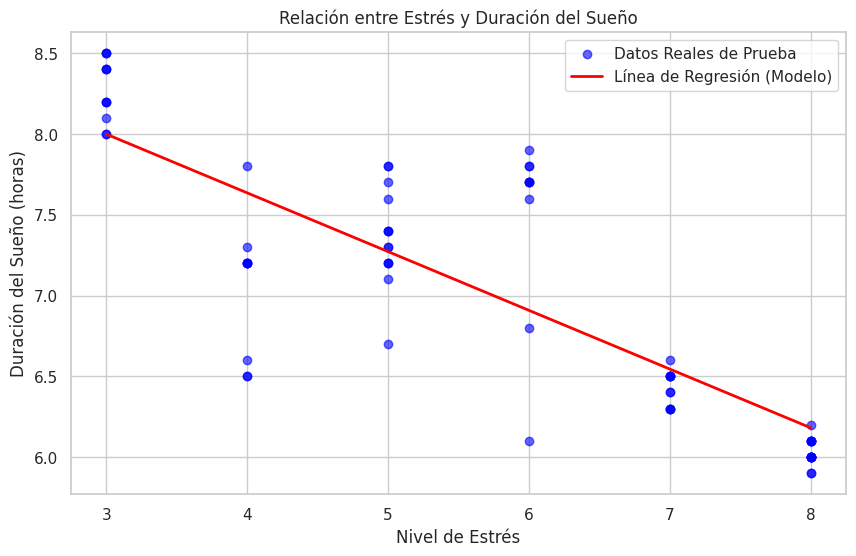

In [29]:
# --- Código para visualizar ---
plt.figure(figsize=(10, 6))

# 1. Dibuja los puntos de datos REALES de tu conjunto de prueba
plt.scatter(X_testeo, y_testeo, color='blue', alpha=0.6, label='Datos Reales de Prueba')

# 2. Dibuja la línea de regresión que aprendió tu modelo
# Creamos una serie de valores de X para que la línea sea suave
x_linea = np.linspace(X_testeo.min(), X_testeo.max(), 100)
# Predecimos los valores de Y para esa línea
y_linea = modelo.predict(x_linea)
plt.plot(x_linea, y_linea, color='red', linewidth=2, label='Línea de Regresión (Modelo)')

# 3. Añade títulos y etiquetas para que sea comprensible
plt.title('Relación entre Estrés y Duración del Sueño')
plt.xlabel('Nivel de Estrés')
plt.ylabel('Duración del Sueño (horas)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Crear un DataFrame para comparar fácilmente
comparacion = pd.DataFrame({
    'Valor Real (y_testeo)': y_testeo,
    'Predicción del Modelo (y_pred)': y_pred.round(2),
    'Error': (y_testeo - y_pred).round(2)
})

# Mostrar las primeras 10 comparaciones
print("\n--- Comparación Detallada (Primeros 10 casos) ---")
print(comparacion.head(10))

# También puedes ver dónde el modelo se equivocó más
print("\n--- Mayores Errores de Predicción ---")
print(comparacion.sort_values(by='Error', key=abs, ascending=False).head(5))


--- Comparación Detallada (Primeros 10 casos) ---
     Valor Real (y_testeo)  Predicción del Modelo (y_pred)  Error
329                    8.5                            8.00   0.50
33                     6.1                            6.18  -0.08
15                     6.0                            6.18  -0.18
325                    8.5                            8.00   0.50
57                     6.0                            6.18  -0.18
239                    6.4                            6.54  -0.14
76                     6.0                            6.18  -0.18
119                    7.2                            7.64  -0.44
332                    8.4                            8.00   0.40
126                    7.3                            7.27   0.03

--- Mayores Errores de Predicción ---
     Valor Real (y_testeo)  Predicción del Modelo (y_pred)  Error
237                    6.5                            7.64  -1.14
255                    6.5                          